In [1]:
using Base.Threads
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=12)

In [2]:
function sim_binomial(n, k, ps; L=10^5)
    lik = similar(ps)
    @threads for i in eachindex(ps)
        bin = Binomial(n, ps[i])
        lik[i] = mean(rand(bin) == k for _ in 1:L) # likelihood
    end
    lik
end

function plot_sim_binomial(n, k, ps; L=10^5, kwargs...)
    @time lik = sim_binomial(n, k, ps; L)
    plot(ps, lik; label="", kwargs...)
end

plot_sim_binomial (generic function with 1 method)

  6.480755 seconds (399.25 k allocations: 21.386 MiB, 3.19% compilation time)


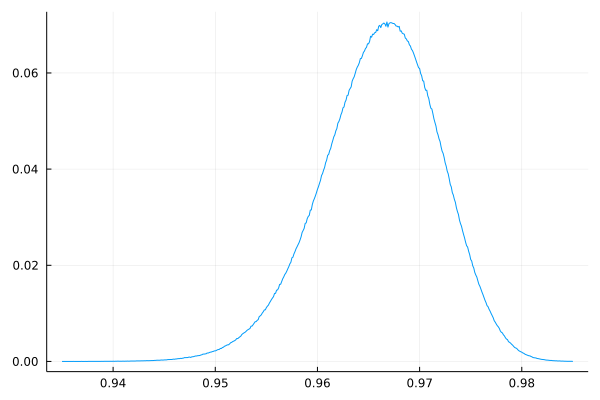

In [3]:
plot_sim_binomial(1000, 967, 0.935:0.0001:0.985; L=10^6)

  3.848696 seconds (105 allocations: 10.609 KiB)


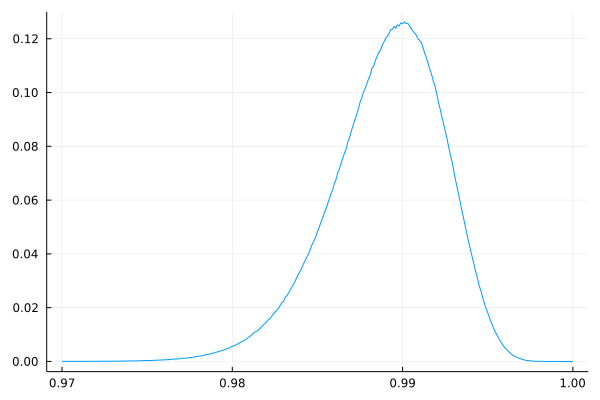

In [4]:
plot_sim_binomial(1000, 990, 0.97:0.0001:1; L=10^6)

  2.609180 seconds (94 allocations: 9.656 KiB)


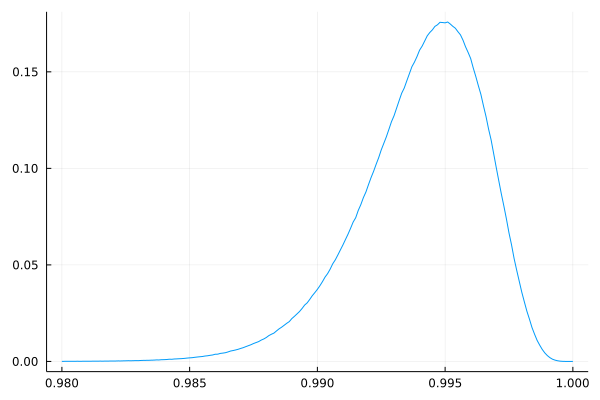

In [5]:
plot_sim_binomial(1000, 995, 0.98:0.0001:1; L=10^6)

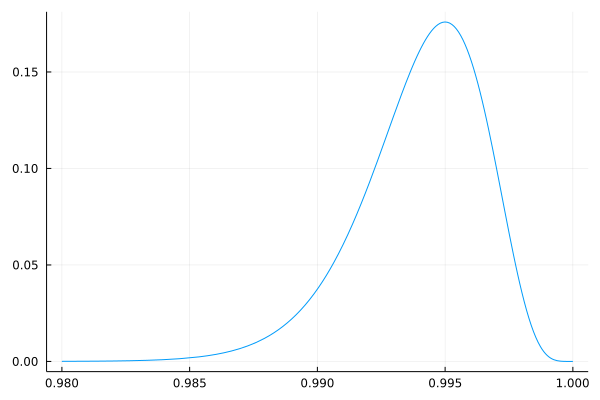

In [6]:
plot(p -> pdf(Binomial(1000, p), 995), 0.98, 1; label="")

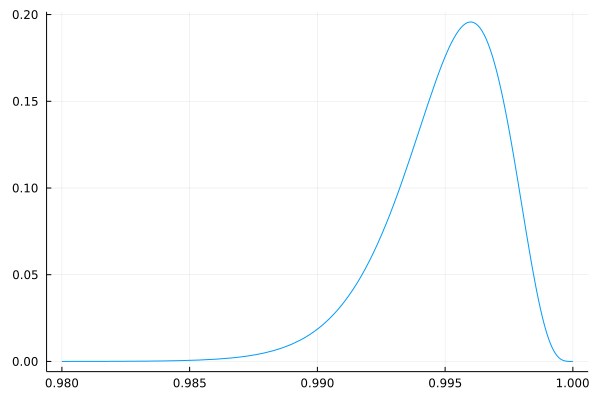

In [7]:
plot(p -> pdf(Binomial(1000, p), 996), 0.98, 1; label="")

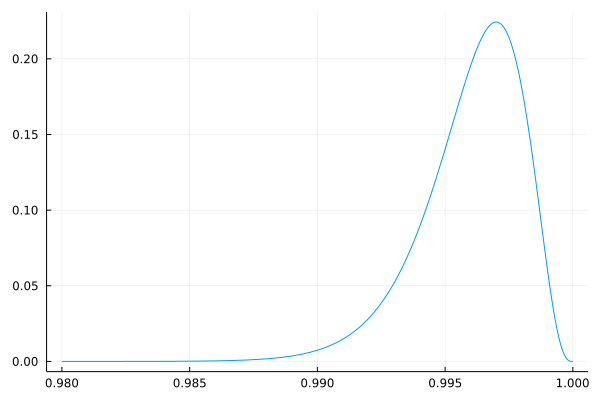

In [8]:
plot(p -> pdf(Binomial(1000, p), 997), 0.98, 1; label="")

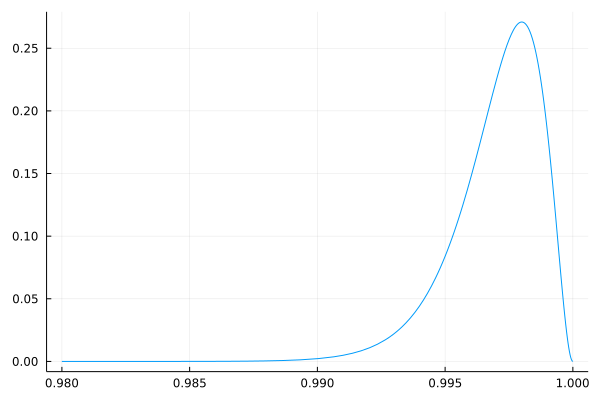

In [9]:
plot(p -> pdf(Binomial(1000, p), 998), 0.98, 1; label="")

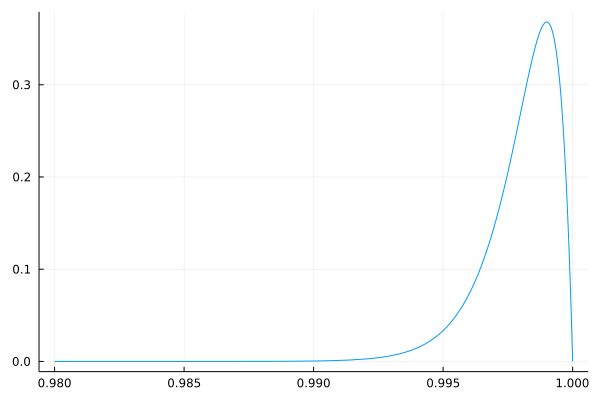

In [10]:
plot(p -> pdf(Binomial(1000, p), 999), 0.98, 1; label="")

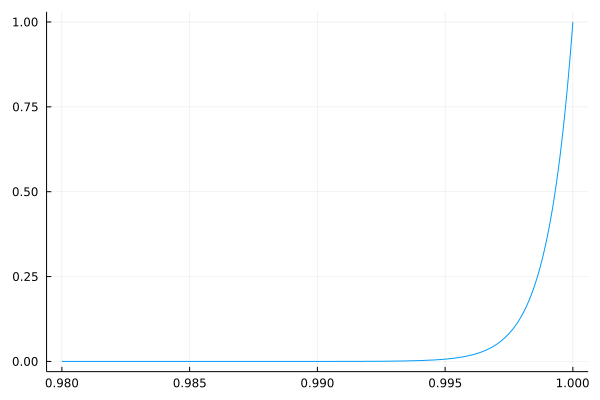

In [11]:
plot(p -> pdf(Binomial(1000, p), 1000), 0.98, 1; label="")

In [12]:
ps = 0.98:0.001:1

0.98:0.001:1.0

In [13]:
for p in ps
    print(p, " ")
end

0.98 0.981 0.982 0.983 0.984 0.985 0.986 0.987 0.988 0.989 0.99 0.991 0.992 0.993 0.994 0.995 0.996 0.997 0.998 0.999 1.0 

In [14]:
lik = similar(ps)

21-element Vector{Float64}:
 5.0e-324
 5.0e-324
 1.5e-323
 0.0
 5.0e-324
 0.0
 5.0e-324
 5.0e-324
 0.0
 5.0e-324
 5.0e-324
 0.0
 0.0
 0.0
 5.0e-324
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [15]:
?:

search: : :: ?: >: <:



```
(:)(start, [step], stop)
```

Range operator. `a:b` constructs a range from `a` to `b` with a step size of 1 (a [`UnitRange`](@ref)) , and `a:s:b` is similar but uses a step size of `s` (a [`StepRange`](@ref)).

`:` is also used in indexing to select whole dimensions  and for [`Symbol`](@ref) literals, as in e.g. `:hello`.

---

```
(:)(start::CartesianIndex, [step::CartesianIndex], stop::CartesianIndex)
```

Construct [`CartesianIndices`](@ref) from two `CartesianIndex` and an optional step.

!!! compat "Julia 1.1"
    This method requires at least Julia 1.1.


!!! compat "Julia 1.6"
    The step range method start:step:stop requires at least Julia 1.6.


# Examples

```jldoctest
julia> I = CartesianIndex(2,1);

julia> J = CartesianIndex(3,3);

julia> I:J
2×3 CartesianIndices{2, Tuple{UnitRange{Int64}, UnitRange{Int64}}}:
 CartesianIndex(2, 1)  CartesianIndex(2, 2)  CartesianIndex(2, 3)
 CartesianIndex(3, 1)  CartesianIndex(3, 2)  CartesianIndex(3, 3)

julia> I:CartesianIndex(1, 2):J
2×2 CartesianIndices{2, Tuple{StepRange{Int64, Int64}, StepRange{Int64, Int64}}}:
 CartesianIndex(2, 1)  CartesianIndex(2, 3)
 CartesianIndex(3, 1)  CartesianIndex(3, 3)
```


In [16]:
?similar

search: similar sim_binomial plot_sim_binomial PoissonBinomial



```
similar(array, [element_type=eltype(array)], [dims=size(array)])
```

Create an uninitialized mutable array with the given element type and size, based upon the given source array. The second and third arguments are both optional, defaulting to the given array's `eltype` and `size`. The dimensions may be specified either as a single tuple argument or as a series of integer arguments.

Custom AbstractArray subtypes may choose which specific array type is best-suited to return for the given element type and dimensionality. If they do not specialize this method, the default is an `Array{element_type}(undef, dims...)`.

For example, `similar(1:10, 1, 4)` returns an uninitialized `Array{Int,2}` since ranges are neither mutable nor support 2 dimensions:

```julia-repl
julia> similar(1:10, 1, 4)
1×4 Array{Int64,2}:
 4419743872  4374413872  4419743888  0
```

Conversely, `similar(trues(10,10), 2)` returns an uninitialized `BitVector` with two elements since `BitArray`s are both mutable and can support 1-dimensional arrays:

```julia-repl
julia> similar(trues(10,10), 2)
2-element BitVector:
 0
 0
```

Since `BitArray`s can only store elements of type [`Bool`](@ref), however, if you request a different element type it will create a regular `Array` instead:

```julia-repl
julia> similar(falses(10), Float64, 2, 4)
2×4 Array{Float64,2}:
 2.18425e-314  2.18425e-314  2.18425e-314  2.18425e-314
 2.18425e-314  2.18425e-314  2.18425e-314  2.18425e-314
```

See also: [`undef`](@ref), [`isassigned`](@ref).

---

```
similar(storagetype, axes)
```

Create an uninitialized mutable array analogous to that specified by `storagetype`, but with `axes` specified by the last argument.

**Examples**:

```
similar(Array{Int}, axes(A))
```

creates an array that "acts like" an `Array{Int}` (and might indeed be backed by one), but which is indexed identically to `A`. If `A` has conventional indexing, this will be identical to `Array{Int}(undef, size(A))`, but if `A` has unconventional indexing then the indices of the result will match `A`.

```
similar(BitArray, (axes(A, 2),))
```

would create a 1-dimensional logical array whose indices match those of the columns of `A`.

---

```
similar(static_array)
similar(static_array, T)
similar(array, ::Size)
similar(array, T, ::Size)
```

Constructs and returns a mutable but statically-sized array (i.e. a `StaticArray`). If the input `array` is not a `StaticArray`, then the `Size` is required to determine the output size (or else a dynamically sized array will be returned).


In [17]:
?pdf

search: pdf pdfsquaredL2norm logpdf logpdf! gradlogpdf Cptrdiff_t



```
pdf(d::Distribution{ArrayLikeVariate{N}}, x::AbstractArray{<:Real,N}) where {N}
```

Evaluate the probability density function of `d` at `x`.

This function checks if the size of `x` is compatible with distribution `d`. This check can be disabled by using `@inbounds`.

# Implementation

Instead of `pdf` one should implement `_pdf(d, x)` which does not have to check the size of `x`. However, since the default definition of `pdf(d, x)` falls back to `logpdf(d, x)` usually it is sufficient to implement `logpdf`.

See also: [`logpdf`](@ref).

---

```
pdf(d::Distribution{ArrayLikeVariate{N}}, x) where {N}
```

Evaluate the probability density function of `d` at every element in a collection `x`.

This function checks for every element of `x` if its size is compatible with distribution `d`. This check can be disabled by using `@inbounds`.

Here, `x` can be

  * an array of dimension `> N` with `size(x)[1:N] == size(d)`, or
  * an array of arrays `xi` of dimension `N` with `size(xi) == size(d)`.

---

```
pdf(d::UnivariateDistribution, x::Real)
```

Evaluate the probability density (mass) at `x`.

See also: [`logpdf`](@ref).

---

```
pdf(d::Union{UnivariateMixture, MultivariateMixture}, x)
```

Evaluate the (mixed) probability density function over `x`. Here, `x` can be a single sample or an array of multiple samples.


In [18]:
?cdf

search: cdf ecdfplot ecdfplot! logcdf ccdf invlogcdf logccdf logdiffcdf



```
cdf(d::UnivariateDistribution, x::Real)
```

Evaluate the cumulative probability at `x`.

See also [`ccdf`](@ref), [`logcdf`](@ref), and [`logccdf`](@ref).

---

```
cdf(d::Skellam, t::Real)
```

Implementation based on SciPy: https://github.com/scipy/scipy/blob/v0.15.1/scipy/stats/*discrete*distns.py

Refer to Eqn (5) in On an Extension of the Connexion Between Poisson and χ2 Distributions, N.L Johnson(1959) Vol 46, No 3/4, doi:10.2307/2333532 It relates the Skellam and Non-central chisquare PDFs, which is very similar to their CDFs computation as well.

Computing cdf of the Skellam distribution.

---

```
cdf(d, x)
```

Calculates the CDF of the distribution. To determine the CDF, the incomplete gamma function is required. The CDF  of the Gamma distribution provides this, with the necessary 1/Γ(a) normalization.


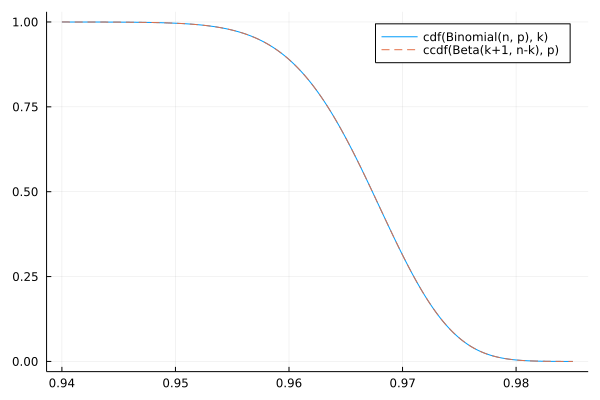

In [20]:
n, k = 1000, 967
ps = 0.94:0.0001:0.985
plot(ps, p -> cdf(Binomial(n, p), k); label="cdf(Binomial(n, p), k)")
plot!(ps, p -> ccdf(Beta(k+1, n-k), p); label="ccdf(Beta(k+1, n-k), p)", ls=:dash)